<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Module 3 - Bayesian Decision Networks</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>

---

### **Bayesian Decision Networks**
Decision networks enhance standard Bayesian networks by adding decision-making capabilities through utility theory.

**Formula**: Decision Theory = Utility Theory + Probability Theory

### **Expected Utility**
**Goal**: Choose actions that maximize expected utility

**Formula**: $EU(A|E) = Σ Pr(O|E,A) × U(O|A)$

**Variables**:
- **E** = Available evidence
- **A** = Non-deterministic action 
- **O** = Possible outcome state
- **U** = Utility value
- **U(O|A)** = Utility of outcome given action A
- **Pr(O|E,A)** = Probability of outcome given evidence and action

**Process**:
1. Consider all possible outcomes from an action
2. Multiply each outcome's utility by its probability  
3. Sum all values
4. Pick action with highest expected utility

### **Node Types**

**🔵 Chance Nodes (Ovals)**
- Random variables with probability tables
- Parents can be decision or other chance nodes

**🔲 Decision Nodes (Rectangles)**
- Represent choice points for decision-maker
- Store optimal decisions for different evidence combinations

**🔶 Utility Nodes (Diamonds)**
- Represent agent's preferences/utility function
- Parents are variables that directly affect utility

### **Link Types**

**Information Links**
- Connect to decision nodes
- Indicate what information is available when making decisions

**Conditioning Links**
- Same as regular Bayesian networks
- Show probabilistic dependencies between chance nodes

---

### **Example: Fever Decision Network**

#### **Problem Description**
Suppose that you know that a fever can be caused by the flu. You can use a thermometer, which is fairly reliable, to test whether or not you have a fever. 

Suppose you also know that if you take aspirin it will almost certainly lower a fever to normal. Some people (about 5% of the population) have a negative reaction to aspirin. 

You’ll be happy to get rid of your fever, so long as you don’t suffer an adverse reaction if you take aspirin.

**Goal:** Decide whether to take aspirin based on available evidence.

**Format:**
**P(Child|Parent)** = Probability of child node given parent nodes

- **P(FE=T|FLU=T)**: Probability of fever given you **have** flu
- **P(FE=T|FLU=F)**: Probability of fever given you **don't have** flu
- Shows how flu **causes** fever (high probability when flu present)
- Represents the **causal relationship** between parent (FLU) and child (FE) nodes

**Information Links:** The dotted arrow from Thermometer to Take Aspirin represents an **information link** - the decision maker knows the thermometer reading when deciding.

<br>

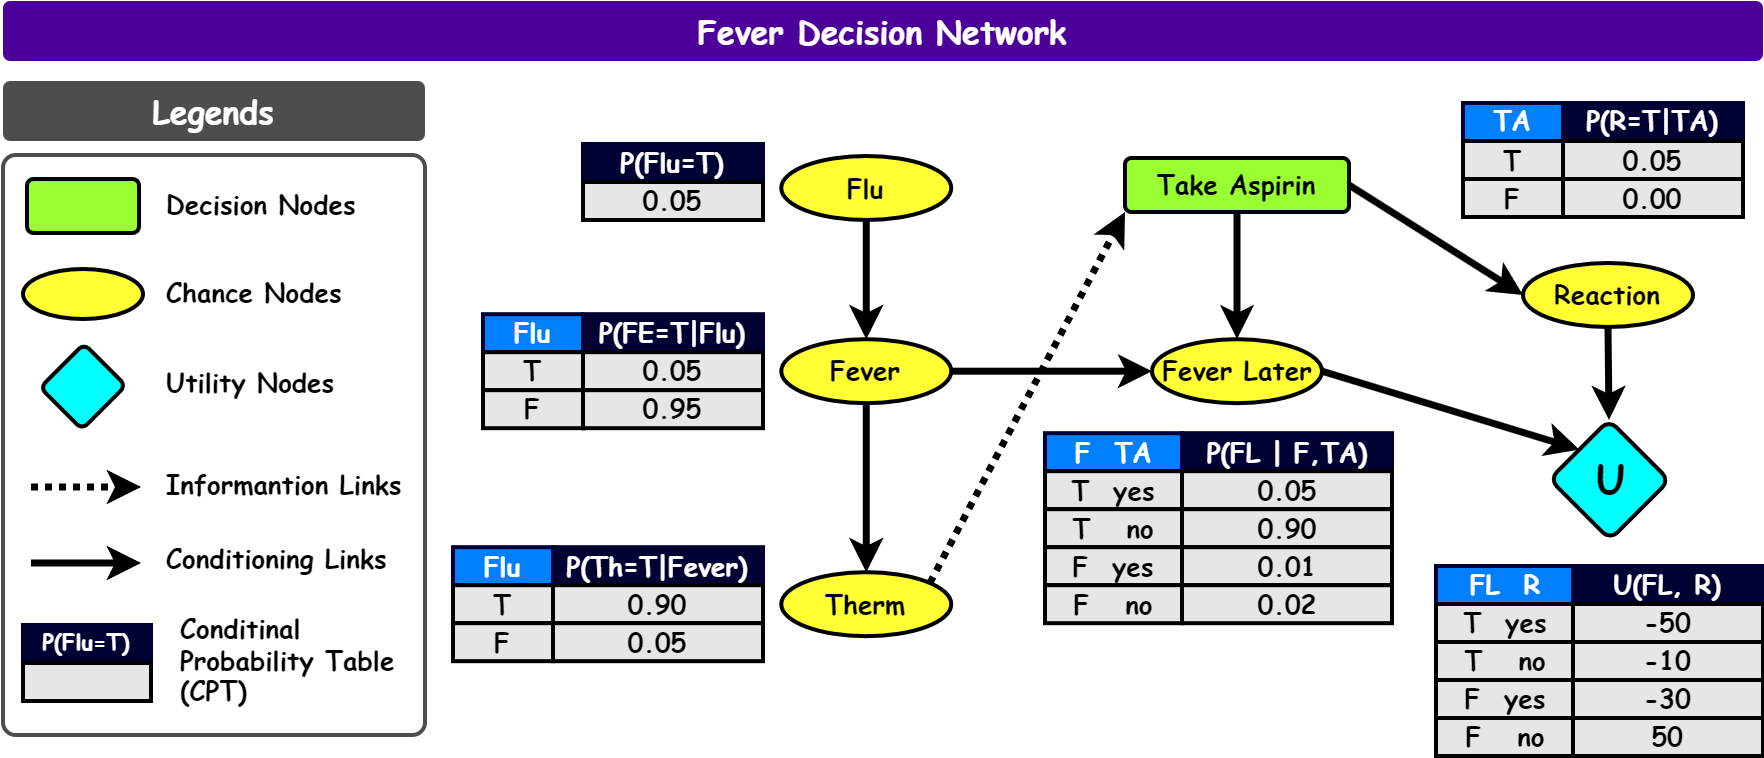


### **Decision Table Results**
The Table below is an example of what part of the decision table for taking aspirin might look like. 

| Evidence | Belief(Flu=T) | Expected Utility (Take=yes) | Expected Utility (Take=no) | Decision |
|----------|---------------|--------------|-------------|----------|
| None     | 0.046         | 45.27        | 45.29       | **No**   |
| Th=F     | 0.018         | 45.4         | 48.41       | **No**   |
| Th=T     | 0.273         | 44.12        | 19.13       | **Yes**  |
| Th=T, Re=T | 0.033       | -30.32       | 0           | **No**   |

### **Conclusion**
- **Without thermometer reading**: Don't take aspirin (marginal difference)
- **Thermometer shows no fever**: Don't take aspirin
- **Thermometer shows fever**: Take aspirin (much higher expected utility)
- **Known negative reaction**: Never take aspirin (negative utility)

---

### **Reasoning with Bayesian Networks**

Reasoning is a basic task for any probabilisitc inference system. A Bayesian Network performing reasoning will have a **set of evidence variables** and **set of query variables** for us to attain information. This process is also called conditioning, belief updating or inference. **There are Four Types of Reasoning in Bayesian Networks.** Each type leverages different **directions of causality** in the network to answer different clinical questions using the same underlying probabilistic model.

<b>

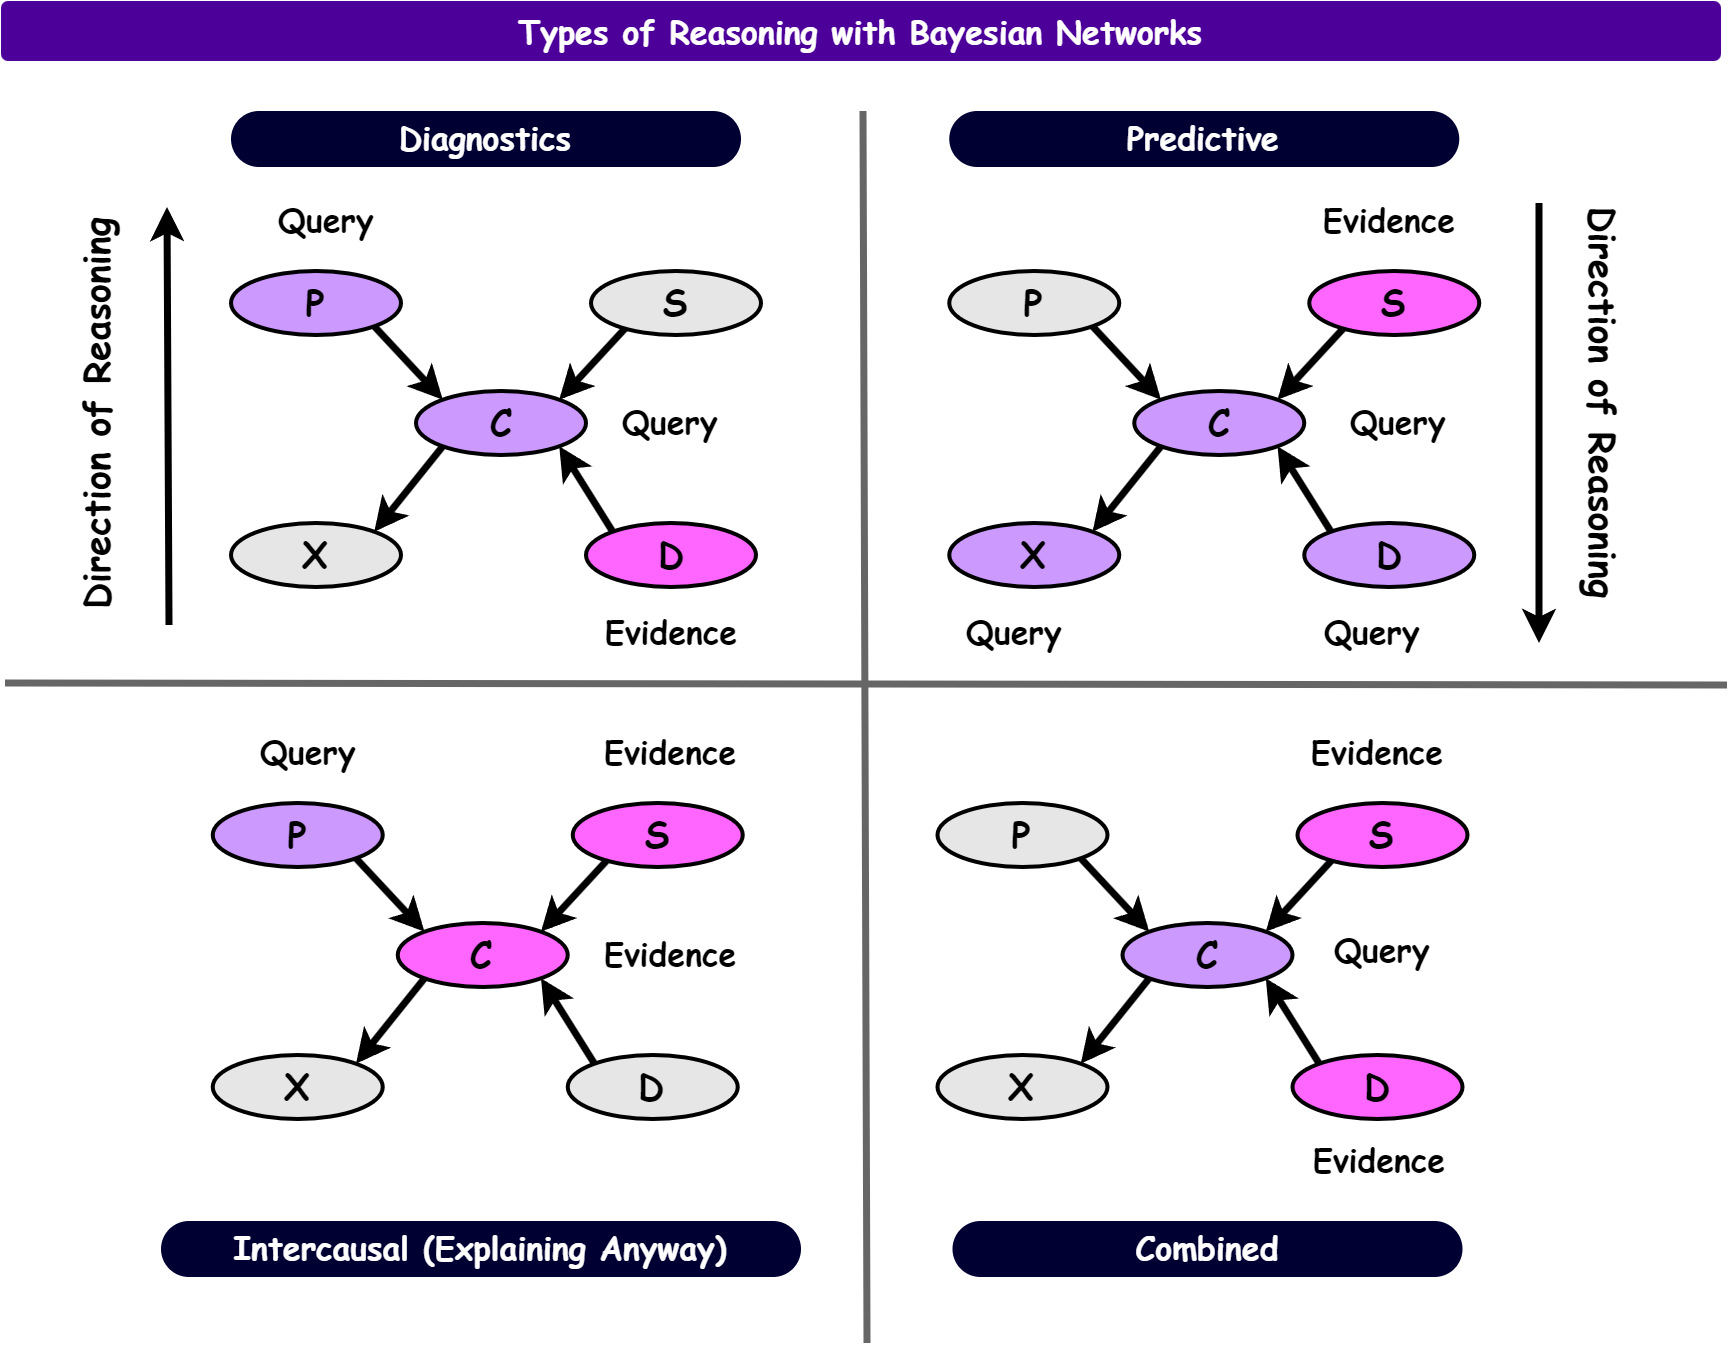

#### **1. Diagnostic Reasoning**
**Direction**: Effect → Cause (reasoning backwards)

**What we have**:
- **Evidence**: S (symptom/test positive), D (another effect)
- **Query**: P (predisposing factor), C (disease)

**Why**: We observe symptoms and want to find the underlying cause
**Example**: "Patient has positive test + symptoms → Do they have cancer?"



#### **2. Predictive Reasoning**
**Direction**: Cause → Effect (reasoning forwards)

**What we have**:
- **Evidence**: S (known symptom/test)
- **Query**: C (disease status), X (other effects), D (outcomes)

**Why**: We have some evidence and want to predict other effects
**Example**: "Given this test result → What's probability of disease and other symptoms?"


#### **3. Intercausal Reasoning (Explaining Away)**
**Direction**: Competing causes for same effect

**What we have**:
- **Evidence**: S (symptom), C (confirmed disease)
- **Query**: P (alternative cause)

**Why**: Multiple causes can explain same effect - confirming one reduces probability of others
**Example**: "Patient has disease + symptoms → Less likely due to genetic predisposition"


#### **4. Combined Reasoning**
**Direction**: Mixed evidence from multiple sources

**What we have**:
- **Evidence**: S (test result), D (outcome data)
- **Query**: C (disease status), X (other effects)

**Why**: Real-world scenarios with evidence at multiple levels
**Example**: "Given test results + treatment outcomes → What's disease probability and risk of other effects?"

---

### **Exact Inference in Bayesian Networks**

**Goal**: Calculate the posterior probability of query variables given evidence
- Find P(Q|E) where Q = query, E = evidence
- Determine the most likely explanation by considering all possible values Q can take

#### **Inference by Enumeration**

**Basic Approach**
1. **State** the marginal probability we need
2. **Figure out** ALL joint probabilities required  
3. **Calculate and combine** them using the chain rule

Process is to Sum over all possible combinations of unknown variables and use network structure to find conditional probabilities. Then Apply chain rule to calculate probability of each variable assignment.

### **Example: Cancer Network**
Suppose we want to know the probability of someone having a positive 'X-ray', 'Dyspnoea', and being exposed to high 'pollution' levels. We don’t know 'Smoker' or 'Cancer' status. 

**Given**:
- **Query** = P, X, D (Pollution=T, X-ray=T, Dyspnoea=T)
- **Unknown** = S, C (Smoker status, Cancer status)

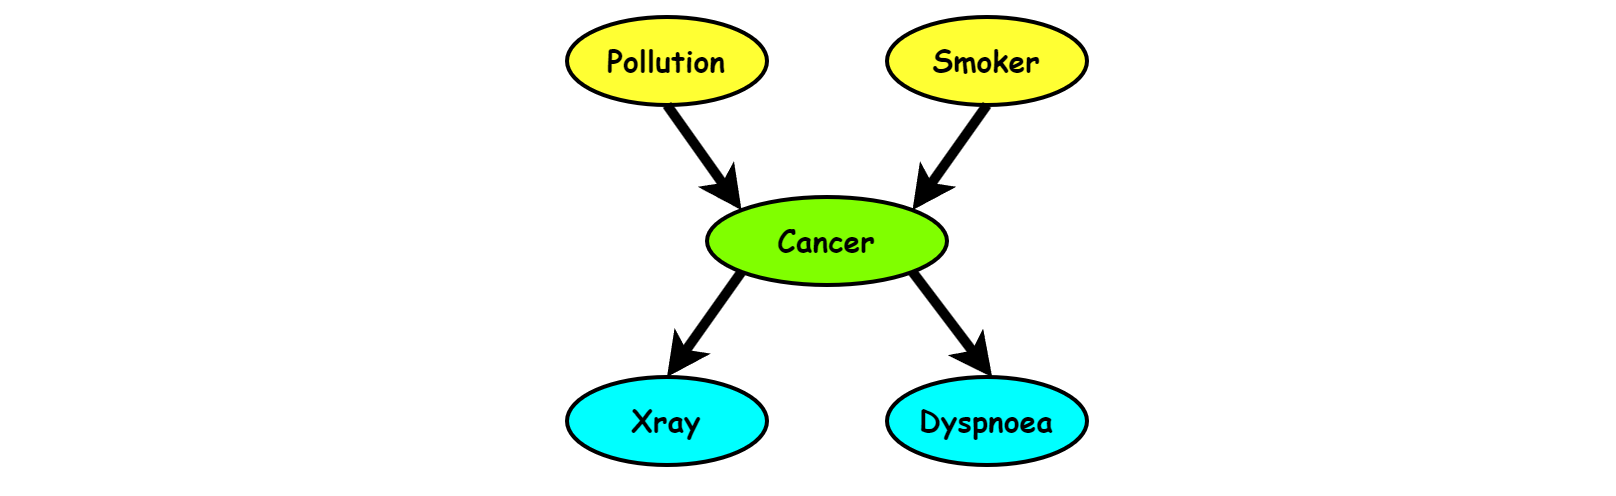

#### **Solution Formula**
$$\begin{align}
Pr(P, X, D) &= Pr(P)Pr(S=T)Pr(C=T|P, S=T)Pr(X|C=T)Pr(D|C=T) \\
&+ Pr(P)Pr(S=T)Pr(C=F|P, S=T)Pr(X|C=F)Pr(D|C=F) \\
&+ Pr(P)Pr(S=F)Pr(C=T|P, S=F)Pr(X|C=T)Pr(D|C=T) \\
&+ Pr(P)Pr(S=F)Pr(C=F|P, S=F)Pr(X|C=F)Pr(D|C=F)
\end{align}$$

#### **Four Terms to Calculate**
1. $Pr(P)Pr(S=T)Pr(C=T|P, S=T)Pr(X|C=T)Pr(D|C=T)$
2. $Pr(P)Pr(S=T)Pr(C=F|P, S=T)Pr(X|C=F)Pr(D|C=F)$ 
3. $Pr(P)Pr(S=F)Pr(C=T|P, S=F)Pr(X|C=T)Pr(D|C=T)$
4. $Pr(P)Pr(S=F)Pr(C=F|P, S=F)Pr(X|C=F)Pr(D|C=F)$
